In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Load your data (hypothetical file paths)
wv = pd.read_csv('5DATA.csv')  # Spectral data with columns wv1, wv2, ..., wvN
spad_data = pd.read_csv('5DATA.csv')  # SPAD data with a single column 'SPAD'

In [3]:
# Check for missing values
print(wv.isnull().sum())

wv1       0
wv 2      0
wv3       0
wv4       0
wv5       0
         ..
wv1789    0
wv1790    0
wv1791    0
wv1792    0
spad      0
Length: 1793, dtype: int64


In [4]:
#Explore data statistics
wv.describe()

,wv1,wv 2,wv3,wv4,wv5,wv6,wv7,wv8,wv9,wv10,...,wv1784,wv1785,wv1786,wv1787,wv1788,wv1789,wv1790,wv1791,wv1792,spad
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,...,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,6.358047,6.660348,6.906229,6.923614,6.589181,6.642817,6.932233,6.923793,6.655735,6.692088,...,46.793199,46.276801,46.420292,46.856846,46.594759,46.225432,46.272166,46.317149,45.945713,31.241313
std,2.450184,2.587438,2.737231,2.717674,2.587619,2.671072,2.801769,2.776750,2.635493,2.576869,...,21.649549,21.733446,21.727518,21.625214,21.764859,21.886222,21.869000,21.934898,22.072896,6.278641
min,2.690000,2.723333,2.723333,2.870000,2.720000,2.673333,2.893333,2.886667,2.660000,2.750000,...,20.640000,19.163333,19.550000,21.106667,20.760000,19.083333,19.643333,20.470000,18.496667,17.200000
25%,3.975000,4.091667,4.348333,4.486667,4.210000,4.120000,4.400000,4.410000,4.200000,4.238333,...,27.691667,27.560000,27.478333,27.521667,27.203333,27.225000,27.180000,26.671667,26.451667,26.650000
50%,6.325556,6.938889,7.076667,6.997778,6.502222,6.736667,6.927778,6.911111,6.540000,6.538889,...,44.620000,43.736667,43.910000,44.426667,44.073333,43.856667,44.016667,44.190000,44.123333,30.800000
75%,8.207222,8.446667,8.456667,8.441667,8.450000,8.520000,8.616667,8.648333,8.606667,8.645000,...,54.924444,54.632222,54.692778,54.938333,54.817222,54.648333,54.706111,54.753889,54.623333,37.500000
max,12.201111,13.646667,15.008889,15.252222,14.128889,14.355556,15.363333,15.263333,14.090000,13.826667,...,106.491111,106.148889,106.332222,106.667778,106.666667,106.353333,106.357778,106.508889,106.068889,42.200000


In [5]:
# Normalize spectral data
wv_normalized = (wv- wv.mean()) / wv.std()

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized_wv = scaler.fit_transform(wv)

In [7]:
# Apply Savitzky-Golay filter # smoothing
from scipy.signal import savgol_filter
smoothed_wv = savgol_filter(wv_normalized, window_length=11, polyorder=3, axis=0)

In [8]:
# Calculate correlation coefficients
correlation_matrix = wv.corr()
spad_correlations = correlation_matrix['spad'].drop('spad')  # Exclude self-correlation

# Display correlation values
print(spad_correlations)

wv1      -0.773454
wv 2     -0.720017
wv3      -0.652800
wv4      -0.627090
wv5      -0.676076
            ...   
wv1788   -0.398175
wv1789   -0.402879
wv1790   -0.402810
wv1791   -0.403568
wv1792   -0.413104
Name: spad, Length: 1792, dtype: float64


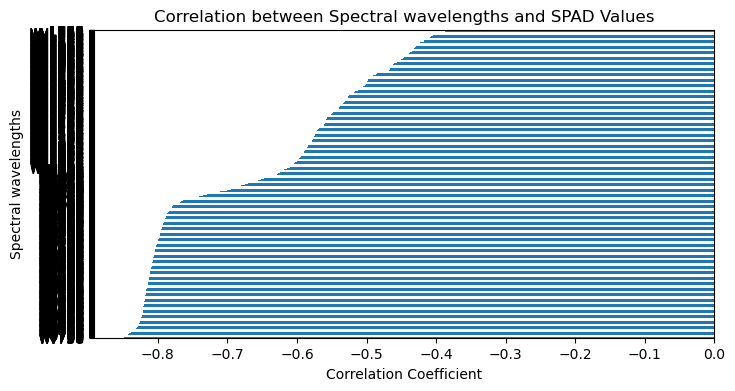

In [9]:
# Bar plot of correlations
plt.figure(figsize=(8, 4))
spad_correlations.sort_values().plot(kind='barh')
plt.title('Correlation between Spectral wavelengths and SPAD Values')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Spectral wavelengths')
plt.show()

In [10]:
#Split data
from sklearn.model_selection import train_test_split, GridSearchCV
X = smoothed_wv
y = spad_data['spad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=170)

In [11]:
# Train Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
rf = RandomForestRegressor(n_estimators=60, random_state=50, max_depth =20, min_samples_split =10, min_samples_leaf = 12, max_features = 13)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [12]:
# Evaluate models
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

In [13]:
rf_metrics = evaluate_model(y_test, y_pred_rf)
print(f"Random Forest - MAE: {rf_metrics[0]}, RMSE: {rf_metrics[1]}, R²: {rf_metrics[2]}")

Random Forest - MAE: 1.4060639921118958, RMSE: 1.988842503524345, R²: 0.8742511196287517


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [15]:
# Initialize and train the RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, random_state=170)
classifier.fit(X_train, y_train)

ValueError: Unknown label type: 'continuous'

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [ ]:
# Set up the Grid Search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best estimator
best_rf = grid_search.best_estimator_

# Predict on the test set
y_pred = best_rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Best parameters found by Grid Search
print("Best Parameters found by Grid Search:")
print(grid_search.best_params_)


In [ ]:
# Evaluate models
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

In [ ]:
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

In [ ]:
print("Best Parameters found by Grid Search:")
print(grid_search.best_params_)


In [ ]:
# Feature importance for Random Forest
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

In [ ]:
# Assuming y_train and y_test are your continuous SPAD values
y_train = [10, 20, 30, 40, 50, 60, 80]
y_test = [15, 25, 35, 45, 55, 65, 85]

# Define thresholds for categorization
threshold1 = 20
threshold2 = 30
threshold3 = 40
threshold4 = 50

# Define bin edges and labels
bin_edges = [0, threshold1, threshold2, threshold4, float('inf')]
bin_labels = ['low', 'medium','high', 'very high']

In [ ]:
# Initialize and fit KBinsDiscretizer
encoder = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
encoder.fit(pd.DataFrame(y_train))

In [ ]:
# Transform y_train and y_test to categorical values
y_train_class = encoder.transform(pd.DataFrame(y_train))
y_test_class = encoder.transform(pd.DataFrame(y_test))

In [ ]:
# Convert categorical values to labels
y_train_labels = pd.cut(y_train, bins=bin_edges, labels=bin_labels)
y_test_labels = pd.cut(y_test, bins=bin_edges, labels=bin_labels)

# Now you can use y_train_class and y_test_class for classification
# or use y_train_labels and y_test_labels for classification tasks

In [ ]:
pip install xgboost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=170)